# **Data Extraction**

### 20210901 - 20220331

In [76]:
import pandas as pd

file1_path = "History and Forecast CSV/History and Forecast Report-20210901 - 20220331.xls"

# Load Excel file (no delimiter, specify xlrd for .xls)
df1_raw = pd.read_excel(file1_path, skiprows=4, engine="xlrd")

# Drop completely empty columns
df1_raw.dropna(axis=1, how="all", inplace=True)

# Drop rows that are entirely NaN
df1_raw.dropna(how="all", inplace=True)

# Reset index
df1_raw.reset_index(drop=True, inplace=True)

# Ensure Date column is correctly formatted
df1_raw.rename(columns={df1_raw.columns[0]: "Date"}, inplace=True)
df1_raw["Date"] = pd.to_datetime(df1_raw["Date"].astype(str).str.strip(), format="%d-%m-%Y %H:%M", errors="coerce")

# Drop last 2 rows
df1_raw = df1_raw.iloc[:-2]

# Rename columns
df1_raw.rename(columns={
    'Saleable': 'Total Room Inventory',
    'Booked': 'Rooms Sold',
    'Arrival': 'Arrival Rooms',
    'Comp': 'Compliment Rooms',
    'Fit': 'Individual Confirm',
    'Occ %': 'Occupancy %',
    'Room Rev': 'Room Revenue',
    'Dep Rooms': 'Departure Rooms',
    'Total Pax': 'Pax',
    'Average Rate': 'ARR'
}, inplace=True)

# Add snapshot_date, arrival_date, actual_or_forecast
df1_raw["snapshot_date"] = pd.to_datetime(df1_raw["Date"].dt.strftime("%Y%m%d"), format="%Y%m%d", errors="coerce")
df1_raw["arrival_date"] = pd.to_datetime(df1_raw["Date"], errors="coerce")
df1_raw["actual_or_forecast"] = "actual"

# Add day name
df1_raw["Day"] = df1_raw["Date"].dt.day_name()

df1_raw


WARNING *** file size (73664) not 512 + multiple of sector size (512)


,Date,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 19,Unnamed: 22,Unnamed: 24,Unnamed: 27,Unnamed: 31,Unnamed: 33,Unnamed: 36,snapshot_date,arrival_date,actual_or_forecast,Day
0,NaT,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835.21,5280.6428,45.0,15.0,172.0,NaT,NaT,actual,NaN
1,NaT,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455.06,5490.7527,32.0,16.0,170.0,NaT,NaT,actual,NaN
2,NaT,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071.92,5457.5165,35.0,14.0,169.0,NaT,NaT,actual,NaN
3,NaT,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949.05,5887.4918,36.0,14.0,182.0,NaT,NaT,actual,NaN
4,NaT,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046.94,5824.9731,38.0,13.0,182.0,NaT,NaT,actual,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaT,114.0,113.0,63.0,0.0,2.0,113.0,97.3684,824147.49,7293.3406,64.0,18.0,167.0,NaT,NaT,actual,NaN
208,NaT,113.0,113.0,43.0,0.0,1.0,113.0,99.1150,903418.02,7994.8497,46.0,19.0,164.0,NaT,NaT,actual,NaN
209,NaT,113.0,111.0,38.0,0.0,2.0,111.0,96.4602,891644.40,8032.8324,41.0,19.0,167.0,NaT,NaT,actual,NaN
210,NaT,112.0,111.0,42.0,0.0,2.0,111.0,97.3214,905389.04,8156.6580,43.0,20.0,165.0,NaT,NaT,actual,NaN


### 20220401 - 20230205

In [77]:
import pandas as pd

# File paths
file2_path = "History and Forecast CSV/History and Forecast Report-20220401-20230205.xls"

# Step 1: Load dataset and inspect manually to determine correct header row
df2_raw = pd.read_excel(file2_path, skiprows=4, engine="xlrd")

# Step 2: Drop completely empty columns
df2_raw.dropna(axis=1, how="all", inplace=True)

# Step 3: Drop rows that are entirely NaN
df2_raw.dropna(how="all", inplace=True)

# Reset index
df2_raw.reset_index(drop=True, inplace=True)

# Step 4: Ensure Date column is correctly formatted
df2_raw.rename(columns={df2_raw.columns[0]: "Date"}, inplace=True)

df2_raw["Date"] = pd.to_datetime(df2_raw["Date"].str.strip(), format="%d-%m-%Y %H:%M", errors="coerce")


# Drop last 2 rows from df2_raw
df2_raw = df2_raw.iloc[:-2]
df2_raw.rename(columns={
    'Saleable': 'Total Room Inventory',
    'Booked': 'Rooms Sold',
    'Arrival': 'Arrival Rooms',
    'Comp': 'Compliment Rooms',
    'Fit': 'Individual Confirm',
    'Occ %': 'Occupancy %',
    'Room Rev': 'Room Revenue',
    'Dep Rooms': 'Departure Rooms',
    'Total Pax': 'Pax',
    'Average Rate': 'ARR'
}, inplace=True)

# Adding snapshot_date, arrival_date and actual_or_forecast columns in df2_raw
for idx, row in df2_raw.iterrows():
    date_str = row["Date"]
    snapshot_date = pd.to_datetime(date_str, format="%Y%m%d", errors="coerce")
    df2_raw.loc[idx, "snapshot_date"] = snapshot_date
    df2_raw["arrival_date"] = pd.to_datetime(df2_raw["Date"], errors="coerce")
    df2_raw["actual_or_forecast"] = "actual"

df2_raw["Day"] = df2_raw["Date"].dt.day_name()


df2_raw

WARNING *** file size (106432) not 512 + multiple of sector size (512)


,Date,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 19,Unnamed: 22,Unnamed: 24,Unnamed: 27,Unnamed: 31,Unnamed: 33,Unnamed: 36,snapshot_date,arrival_date,actual_or_forecast,Day
0,NaT,113.0,102.0,51.0,0.0,3.0,102.0,87.6106,786609.73,7711.8600,51.0,19.0,148.0,NaT,NaT,actual,NaN
1,NaT,113.0,101.0,48.0,0.0,3.0,101.0,86.7257,835578.56,8273.0550,49.0,19.0,153.0,NaT,NaT,actual,NaN
2,NaT,112.0,90.0,55.0,1.0,3.0,90.0,76.7857,751104.71,8345.6078,64.0,21.0,132.0,NaT,NaT,actual,NaN
3,NaT,113.0,101.0,52.0,1.0,2.0,101.0,86.7257,993025.66,9831.9372,41.0,20.0,138.0,NaT,NaT,actual,NaN
4,NaT,113.0,93.0,38.0,1.0,2.0,93.0,79.6460,779638.77,8383.2125,46.0,19.0,130.0,NaT,NaT,actual,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,NaT,119.0,118.0,37.0,0.0,2.0,118.0,97.4790,1525371.79,12926.8795,33.0,11.0,155.0,NaT,NaT,actual,NaN
307,NaT,120.0,118.0,29.0,0.0,3.0,118.0,95.8333,1448656.84,12276.7528,29.0,10.0,159.0,NaT,NaT,actual,NaN
308,NaT,120.0,119.0,36.0,0.0,2.0,119.0,97.5000,1532358.27,12876.9602,35.0,10.0,173.0,NaT,NaT,actual,NaN
309,NaT,121.0,121.0,60.0,2.0,2.0,121.0,96.6942,1526782.32,12618.0357,60.0,9.0,189.0,NaT,NaT,actual,NaN


### 20230201 - 20231025

In [78]:
import pandas as pd

file_path = "History and Forecast CSV/History and Forecast Report 20230201 - 20231025.xlsx"

# Load Excel file
df3_raw = pd.read_excel(file_path, skiprows=3)

# Rename and convert Date column
df3_raw.rename(columns={df3_raw.columns[0]: "Date"}, inplace=True)
df3_raw["Date"] = pd.to_datetime(df3_raw["Date"], errors="coerce")
df3_raw.dropna(subset=["Date"], inplace=True)  # Drop rows with missing dates

# Drop redundant columns
redundant_columns = [
    "Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue",
    "Tentative Group ARR", "Hold","Group Confirm", "Group Tentative", "Inclusion Revenue"
]
df3_raw.drop(columns=redundant_columns, inplace=True, errors='ignore')

cols_to_rem = ["Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]
df3_raw.drop(columns=cols_to_rem, inplace=True, errors='ignore')

# Vectorized assignment for snapshot_date, arrival_date, and actual_or_forecast
df3_raw["snapshot_date"] = pd.to_datetime(df3_raw["Date"].dt.strftime("%Y%m%d"), format="%Y%m%d", errors="coerce")
df3_raw["arrival_date"] = df3_raw["Date"]
df3_raw["actual_or_forecast"] = "actual"

df3_raw


,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-01,Wednesday,116.0,37.0,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0,2023-02-01,2023-02-01,actual
1,2023-02-02,Thursday,115.0,29.0,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0,2023-02-02,2023-02-02,actual
2,2023-02-03,Friday,117.0,36.0,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0,2023-02-03,2023-02-03,actual
3,2023-02-04,Saturday,117.0,60.0,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0,2023-02-04,2023-02-04,actual
4,2023-02-05,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-05,2023-02-05,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2023-10-21,Saturday,100.0,44.0,1.0,3.0,104.0,89.29,1491531.14,14915.31,33.0,18.0,149.0,112.0,2023-10-21,2023-10-21,actual
263,2023-10-22,Sunday,92.0,39.0,1.0,3.0,96.0,84.40,1424739.24,15486.30,49.0,21.0,153.0,109.0,2023-10-22,2023-10-22,actual
264,2023-10-23,Monday,90.0,33.0,0.0,3.0,93.0,80.36,1207595.55,13417.73,36.0,18.0,141.0,112.0,2023-10-23,2023-10-23,actual
265,2023-10-24,Tuesday,101.0,45.0,0.0,2.0,103.0,87.83,1336085.33,13228.57,37.0,15.0,156.0,115.0,2023-10-24,2023-10-24,actual


### 20230401 - 20240331

In [79]:
import pandas as pd

file_path = "History and Forecast CSV\History and Forecast Report 20230401 - 20240331.xlsx"

df4_raw = pd.read_excel(file_path, skiprows=3)

# Convert Date column to datetime format
df4_raw.rename(columns={df4_raw.columns[0]: "Date"}, inplace=True)  # Explicitly rename date column
df4_raw["Date"] = pd.to_datetime(df4_raw["Date"], errors="coerce")

df4_raw.dropna(subset=["Date"], inplace=True)  # Drop rows with missing dates

redundant_columns = [
    "Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Hold","Group Confirm", "Individual Tentative", "Group Tentative", "Inclusion Revenue"
]
df4_raw.drop(columns=redundant_columns, inplace=True)

cols_to_rem = ["Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]

df4_raw.drop(columns=cols_to_rem, inplace=True)

for idx, row in df4_raw.iterrows():
    date_str = row["Date"]
    snapshot_date = pd.to_datetime(date_str, format="%Y%m%d", errors="coerce")
    df4_raw.loc[idx, "snapshot_date"] = snapshot_date
    df4_raw["arrival_date"] = pd.to_datetime(df4_raw["Date"], errors="coerce")
    df4_raw["actual_or_forecast"] = "actual"
df4_raw

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-04-01,Saturday,111.0,48.0,3.0,1.0,115.0,93.28,1162842.58,10476.06,49.0,11.0,180.0,119.0,2023-04-01,2023-04-01,actual
1,2023-04-02,Sunday,97.0,50.0,1.0,4.0,102.0,83.62,1079504.25,11128.91,63.0,14.0,160.0,116.0,2023-04-02,2023-04-02,actual
2,2023-04-03,Monday,88.0,40.0,0.0,4.0,92.0,75.86,931371.15,10583.76,52.0,14.0,132.0,116.0,2023-04-03,2023-04-03,actual
3,2023-04-04,Tuesday,68.0,32.0,1.0,3.0,72.0,61.82,776760.70,11422.95,53.0,20.0,108.0,110.0,2023-04-04,2023-04-04,actual
4,2023-04-05,Wednesday,54.0,29.0,0.0,2.0,56.0,49.54,647427.35,11989.40,45.0,21.0,79.0,109.0,2023-04-05,2023-04-05,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-03-27,Wednesday,91.0,45.0,1.0,3.0,95.0,88.35,1427730.15,15689.34,31.0,29.0,166.0,103.0,2024-03-27,2024-03-27,actual
362,2024-03-28,Thursday,97.0,46.0,2.0,3.0,88.0,94.17,1457687.18,15027.70,40.0,27.0,186.0,103.0,2024-03-28,2024-03-28,actual
363,2024-03-29,Friday,98.0,41.0,1.0,2.0,77.0,95.15,1468948.25,14989.27,42.0,27.0,193.0,103.0,2024-03-29,2024-03-29,actual
364,2024-03-30,Saturday,97.0,46.0,2.0,3.0,71.0,94.17,1407306.52,14508.31,47.0,27.0,185.0,103.0,2024-03-30,2024-03-30,actual


### 20230206
### ....
### 20250328
### combined files


In [80]:
import os
import glob
import numpy as np
import pandas as pd

# Columns expected from each Excel file
COLS = [
    "Date","Day","Rooms Sold","Rooms for Sale","Arrival Rooms","Compliment Rooms",
    "House Use","Hold","Individual Confirm","Individual Tentative",
    "Group Confirm","Group Tentative","Occupancy %","Room Revenue","ARR",
    "Inclusion Revenue","Departure Rooms","OOO Rooms","Pax",
    "Individual Revenue","Individual ARR","Confirmed Group Revenue","Confirmed Group ARR",
    "Tentative Group Revenue","Tentative Group ARR","Total Room Inventory"
]

FINAL_COLS = COLS + ["snapshot_date","arrival_date","actual_or_forecast"]

# Directory containing your Excel files
excel_dir = "History and Forecast CSV"

# List all Excel files, skipping first 2
all_excel_files = sorted(glob.glob(os.path.join(excel_dir, "*.xlsx")))
print(all_excel_files[0:3])
files_to_use = all_excel_files[3:]

print(f"Found {len(all_excel_files)} Excel files in {excel_dir}")
print(f"Using {len(files_to_use)} files (skipping first 3).")

combined_data = []

for filepath in files_to_use:
    # Parse snapshot_date from filename (adjust depending on filename structure)
    print(filepath)
    filename = os.path.basename(filepath)
    filedate_str = os.path.splitext(filename)[0]
    try:
        date_part = filedate_str.split("-")[-1].replace("_History_and_Forecast_Report","")
        snapshot_date = pd.to_datetime(date_part, format="%Y%m%d", errors="coerce")
    except ValueError:
        snapshot_date = None

    # Read Excel, skipping top 3 rows (adjust if needed)
    df_temp = pd.read_excel(filepath, skiprows=3, header=0)

    # Drop summary rows or empty rows
    df_temp = df_temp[~df_temp["Day"].isin(["Total (History)", "Total (Forecast)", "Grand Total"])]
    df_temp.dropna(subset=["Date","Day"], how="all", inplace=True)
    df_temp.reset_index(drop=True, inplace=True)

    # Reindex to match expected columns
    df_temp = df_temp.reindex(columns=COLS)

    # Add snapshot_date
    df_temp["snapshot_date"] = snapshot_date

    # Convert 'Date' to datetime
    df_temp["arrival_date"] = pd.to_datetime(df_temp["Date"], errors="coerce")

    # Mark 'actual' vs 'forecast'
    df_temp["actual_or_forecast"] = np.where(
        df_temp["arrival_date"] == df_temp["snapshot_date"],
        "actual",
        "forecast"
    )

    # Reorder final columns
    df_temp = df_temp.reindex(columns=FINAL_COLS)

    combined_data.append(df_temp)

# Concatenate all
df_comb_daywise = pd.concat(combined_data, ignore_index=True)
print("FINAL Master shape:", df_comb_daywise.shape)
df_comb_daywise
# # Save to Excel
# output_file = os.path.join(excel_dir, "Master_History_and_Forecast.xlsx")
# df_combined.to_excel(output_file, index=False)
# print(f"Combined data saved to {output_file}")


['History and Forecast CSV\\History and Forecast Report 20230201 - 20231025.xlsx', 'History and Forecast CSV\\History and Forecast Report 20230401 - 20240331.xlsx', 'History and Forecast CSV\\History and Forecast Report-20210901 - 20220331.xlsx']
Found 757 Excel files in History and Forecast CSV
Using 754 files (skipping first 3).
History and Forecast CSV\History and Forecast Report-20230206.xlsx
History and Forecast CSV\History and Forecast Report-20230208.xlsx
History and Forecast CSV\History and Forecast Report-20230209.xlsx
History and Forecast CSV\History and Forecast Report-20230210.xlsx
History and Forecast CSV\History and Forecast Report-20230211.xlsx
History and Forecast CSV\History and Forecast Report-20230212.xlsx
History and Forecast CSV\History and Forecast Report-20230213.xlsx
History and Forecast CSV\History and Forecast Report-20230214.xlsx
History and Forecast CSV\History and Forecast Report-20230215.xlsx
History and Forecast CSV\History and Forecast Report-20230216.xl

,Date,Day,Rooms Sold,Rooms for Sale,Arrival Rooms,Compliment Rooms,House Use,Hold,Individual Confirm,Individual Tentative,...,Individual Revenue,Individual ARR,Confirmed Group Revenue,Confirmed Group ARR,Tentative Group Revenue,Tentative Group ARR,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-05,Sunday,105.0,8.0,50.0,2.0,3.0,0.0,110.0,0.0,...,1499626.34,13632.97,0.00,0.00,0.0,0.0,118.0,2023-02-06,2023-02-05,forecast
1,2023-02-06,Monday,101.0,12.0,68.0,2.0,3.0,0.0,34.0,26.0,...,731411.39,12190.19,587105.96,14319.66,0.0,0.0,118.0,2023-02-06,2023-02-06,actual
2,2023-02-07,Tuesday,113.0,3.0,31.0,2.0,2.0,0.0,34.0,32.0,...,824954.22,12499.31,653105.96,14513.47,0.0,0.0,120.0,2023-02-06,2023-02-07,forecast
3,2023-02-08,Wednesday,114.0,3.0,34.0,2.0,2.0,0.0,32.0,40.0,...,909711.69,12634.88,594241.54,15236.96,0.0,0.0,121.0,2023-02-06,2023-02-08,forecast
4,2023-02-09,Thursday,115.0,0.0,36.0,2.0,2.0,0.0,26.0,44.0,...,865637.91,12366.26,620894.08,18814.97,0.0,0.0,119.0,2023-02-06,2023-02-09,forecast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151153,2026-03-24,Tuesday,29.0,93.0,2.0,0.0,0.0,0.0,0.0,1.0,...,15500.00,15500.00,224000.00,8960.00,0.0,0.0,122.0,2025-03-28,2026-03-24,forecast
151154,2026-03-25,Wednesday,1.0,121.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15500.00,15500.00,0.00,0.00,0.0,0.0,122.0,2025-03-28,2026-03-25,forecast
151155,2026-03-26,Thursday,16.0,106.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,112000.00,8000.00,0.0,0.0,122.0,2025-03-28,2026-03-26,forecast
151156,2026-03-27,Friday,29.0,93.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,151400.00,6056.00,0.0,0.0,122.0,2025-03-28,2026-03-27,forecast


In [81]:
columns_to_drop = ["Individual Tentative", "Confirmed Group ARR", "Tentative Group Revenue", "Tentative Group ARR", "Hold","Group Confirm", "Individual Tentative", "Group Tentative", "Inclusion Revenue","Rooms for Sale", "Individual Revenue", "Individual ARR", "Confirmed Group Revenue"]
df_comb_daywise.drop(columns=columns_to_drop, inplace=True)
df_comb_daywise

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-05,Sunday,105.0,50.0,2.0,3.0,110.0,88.98,1499626.34,14282.16,62.0,13.0,173.0,118.0,2023-02-06,2023-02-05,forecast
1,2023-02-06,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517.35,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
2,2023-02-07,Tuesday,113.0,31.0,2.0,2.0,34.0,94.17,1478060.18,13080.18,20.0,10.0,188.0,120.0,2023-02-06,2023-02-07,forecast
3,2023-02-08,Wednesday,114.0,34.0,2.0,2.0,32.0,94.21,1503953.23,13192.57,33.0,9.0,193.0,121.0,2023-02-06,2023-02-08,forecast
4,2023-02-09,Thursday,115.0,36.0,2.0,2.0,26.0,96.64,1486531.99,12926.37,35.0,11.0,202.0,119.0,2023-02-06,2023-02-09,forecast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151153,2026-03-24,Tuesday,29.0,2.0,0.0,0.0,0.0,23.77,239500.00,8258.62,5.0,8.0,5.0,122.0,2025-03-28,2026-03-24,forecast
151154,2026-03-25,Wednesday,1.0,1.0,0.0,0.0,0.0,0.82,15500.00,15500.00,4.0,8.0,2.0,122.0,2025-03-28,2026-03-25,forecast
151155,2026-03-26,Thursday,16.0,2.0,0.0,0.0,0.0,13.11,112000.00,7000.00,1.0,8.0,2.0,122.0,2025-03-28,2026-03-26,forecast
151156,2026-03-27,Friday,29.0,2.0,0.0,0.0,0.0,23.77,151400.00,5220.69,0.0,8.0,5.0,122.0,2025-03-28,2026-03-27,forecast


### Combining df1_raw, df2_raw, df3_raw and df4_raw

In [82]:
df_4_files_combined = pd.concat([df1_raw,df2_raw, df3_raw, df4_raw], ignore_index=True)
df_4_files_combined

,Date,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 19,Unnamed: 22,Unnamed: 24,Unnamed: 27,...,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory
0,NaT,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835.21,5280.6428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455.06,5490.7527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071.92,5457.5165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949.05,5887.4918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046.94,5824.9731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2024-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,95.0,88.35,1427730.15,15689.34,31.0,29.0,166.0,103.0
1152,2024-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,88.0,94.17,1457687.18,15027.70,40.0,27.0,186.0,103.0
1153,2024-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,77.0,95.15,1468948.25,14989.27,42.0,27.0,193.0,103.0
1154,2024-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,71.0,94.17,1407306.52,14508.31,47.0,27.0,185.0,103.0


# Working with the 4 combined files

#### overview

In [83]:
# 1.1. Shape of the DataFrame
print("Shape:", df_4_files_combined.shape)

# 1.2. First few rows
print("First 5 rows:")
display(df_4_files_combined.head())

# 1.3. Column names
print("Columns:", df_4_files_combined.columns.tolist())

# 1.4. Data types info
print("Info:")
df_4_files_combined.info()

# 1.5. Summary statistics for numeric columns
print("Description (numeric):")
display(df_4_files_combined.describe())

# 1.6. Summary statistics for all columns (including object types)
print("Description (all):")
display(df_4_files_combined.describe(include="all"))

Shape: (1156, 29)
First 5 rows:


,Date,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 19,Unnamed: 22,Unnamed: 24,Unnamed: 27,...,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory
0,NaT,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835.21,5280.6428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,116.0,113.0,34.0,1.0,5.0,113.0,92.2414,620455.06,5490.7527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,118.0,116.0,39.0,0.0,4.0,116.0,94.9153,633071.92,5457.5165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,118.0,116.0,36.0,0.0,4.0,116.0,94.9153,682949.05,5887.4918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,119.0,114.0,36.0,0.0,1.0,114.0,94.9580,664046.94,5824.9731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns: ['Date', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 15', 'Unnamed: 19', 'Unnamed: 22', 'Unnamed: 24', 'Unnamed: 27', 'Unnamed: 31', 'Unnamed: 33', 'Unnamed: 36', 'snapshot_date', 'arrival_date', 'actual_or_forecast', 'Day', 'Rooms Sold', 'Arrival Rooms', 'Compliment Rooms', 'House Use', 'Individual Confirm', 'Occupancy %', 'Room Revenue', 'ARR', 'Departure Rooms', 'OOO Rooms', 'Pax', 'Total Room Inventory']
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  633 non-null    datetime64[ns]
 1   Unnamed: 6            523 non-null    float64       
 2   Unnamed: 7            523 non-null    float64       
 3   Unnamed: 10           523 non-null    float64       
 4   Unnamed: 12           523 non-null    float64       
 5   Unnamed: 15           523 non-n

,Date,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 19,Unnamed: 22,Unnamed: 24,Unnamed: 27,...,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory
count,633,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02,523.000000,...,633.000000,633.000000,633.000000,633.000000,6.330000e+02,633.000000,633.000000,633.000000,633.000000,633.000000
mean,2023-08-15 17:37:49.194312960,109.049713,92.323136,41.652008,0.462715,3.319312,92.323136,80.504535,7.848973e+05,8350.474163,...,1.014218,3.448657,84.786730,78.818088,1.110527e+06,12842.952085,41.328594,21.048973,136.203791,109.579779
min,2023-02-01 00:00:00,50.000000,19.000000,2.000000,0.000000,0.000000,19.000000,22.000000,1.360455e+05,5127.555200,...,0.000000,1.000000,25.000000,22.950000,3.569973e+05,8223.210000,3.000000,7.000000,33.000000,76.000000
25%,2023-05-20 00:00:00,107.000000,79.000000,34.000000,0.000000,2.000000,79.000000,70.642200,6.094952e+05,6877.815700,...,0.000000,3.000000,68.000000,68.100000,7.652107e+05,10553.770000,32.000000,14.000000,106.000000,105.000000
50%,2023-08-07 00:00:00,111.000000,97.000000,42.000000,0.000000,3.000000,97.000000,85.470100,7.548307e+05,7849.660800,...,0.000000,3.000000,84.000000,83.040000,1.083467e+06,12449.970000,40.000000,19.000000,140.000000,111.000000
75%,2023-10-25 00:00:00,114.000000,107.500000,50.000000,1.000000,4.000000,107.500000,92.307700,9.182601e+05,9572.905900,...,2.000000,4.000000,103.000000,92.660000,1.448657e+06,14007.350000,50.000000,26.000000,167.000000,117.000000
max,2024-03-31 00:00:00,121.000000,121.000000,83.000000,17.000000,16.000000,121.000000,100.000000,1.565441e+06,13632.966700,...,9.000000,8.000000,121.000000,99.170000,4.698585e+06,167806.610000,90.000000,56.000000,219.000000,123.000000
std,NaN,9.695034,20.475590,12.313332,1.256419,1.934599,20.475590,15.304332,3.001274e+05,2084.667921,...,1.444584,1.162835,22.000367,16.114225,4.575414e+05,9078.846057,14.355988,9.728553,37.947889,9.156880


Description (all):


,Date,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 19,Unnamed: 22,Unnamed: 24,Unnamed: 27,...,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory
count,633,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02,523.000000,...,633.000000,633.000000,633.000000,633.000000,6.330000e+02,633.000000,633.000000,633.000000,633.000000,633.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023-08-15 17:37:49.194312960,109.049713,92.323136,41.652008,0.462715,3.319312,92.323136,80.504535,7.848973e+05,8350.474163,...,1.014218,3.448657,84.786730,78.818088,1.110527e+06,12842.952085,41.328594,21.048973,136.203791,109.579779
min,2023-02-01 00:00:00,50.000000,19.000000,2.000000,0.000000,0.000000,19.000000,22.000000,1.360455e+05,5127.555200,...,0.000000,1.000000,25.000000,22.950000,3.569973e+05,8223.210000,3.000000,7.000000,33.000000,76.000000
25%,2023-05-20 00:00:00,107.000000,79.000000,34.000000,0.000000,2.000000,79.000000,70.642200,6.094952e+05,6877.815700,...,0.000000,3.000000,68.000000,68.100000,7.652107e+05,10553.770000,32.000000,14.000000,106.000000,105.000000
50%,2023-08-07 00:00:00,111.000000,97.000000,42.000000,0.000000,3.000000,97.000000,85.470100,7.548307e+05,7849.660800,...,0.000000,3.000000,84.000000,83.040000,1.083467e+06,12449.970000,40.000000,19.000000,140.000000,111.000000
75%,2023-10-25 00:00:00,114.000000,107.500000,50.000000,1.000000,4.000000,107.500000,92.307700,9.182601e+05,9572.905900,...,2.000000,4.000000,103.000000,92.660000,1.448657e+06,14007.350000,50.000000,26.000000,167.000000,117.000000
max,2024-03-31 00:00:00,121.000000,121.000000,83.000000,17.000000,16.000000,121.000000,100.000000,1.565441e+06,13632.966700,...,9.000000,8.000000,121.000000,99.170000,4.698585e+06,167806.610000,90.000000,56.000000,219.000000,123.000000


### Removing duplicates

In [84]:
df_4_files_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  633 non-null    datetime64[ns]
 1   Unnamed: 6            523 non-null    float64       
 2   Unnamed: 7            523 non-null    float64       
 3   Unnamed: 10           523 non-null    float64       
 4   Unnamed: 12           523 non-null    float64       
 5   Unnamed: 15           523 non-null    float64       
 6   Unnamed: 19           523 non-null    float64       
 7   Unnamed: 22           523 non-null    float64       
 8   Unnamed: 24           523 non-null    float64       
 9   Unnamed: 27           523 non-null    float64       
 10  Unnamed: 31           523 non-null    float64       
 11  Unnamed: 33           523 non-null    float64       
 12  Unnamed: 36           523 non-null    float64       
 13  snapshot_date     

#### Count duplicates based on 'Date'


In [85]:
duplicate_count = df_4_files_combined.duplicated(subset=['Date']).sum()
print("Number of duplicate rows based on 'Date':", duplicate_count)

Number of duplicate rows based on 'Date': 730


#### Remove duplicate rows (keeping the first occurrence)

In [86]:
df_4_files_combined = df_4_files_combined.drop_duplicates(subset=['Date'], keep='first')


In [87]:
df_4_files_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 1155
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  425 non-null    datetime64[ns]
 1   Unnamed: 6            1 non-null      float64       
 2   Unnamed: 7            1 non-null      float64       
 3   Unnamed: 10           1 non-null      float64       
 4   Unnamed: 12           1 non-null      float64       
 5   Unnamed: 15           1 non-null      float64       
 6   Unnamed: 19           1 non-null      float64       
 7   Unnamed: 22           1 non-null      float64       
 8   Unnamed: 24           1 non-null      float64       
 9   Unnamed: 27           1 non-null      float64       
 10  Unnamed: 31           1 non-null      float64       
 11  Unnamed: 33           1 non-null      float64       
 12  Unnamed: 36           1 non-null      float64       
 13  snapshot_date         42

### converting the revenue to int

In [88]:
df_4_files_combined

,Date,Unnamed: 6,Unnamed: 7,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 19,Unnamed: 22,Unnamed: 24,Unnamed: 27,...,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory
0,NaT,117.0,117.0,49.0,1.0,6.0,117.0,94.0171,617835.21,5280.6428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,118.0,97.48,1525371.79,13149.76,33.0,11.0,155.0,119.0
524,2023-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,118.0,95.83,1448656.84,12597.02,29.0,10.0,159.0,120.0
525,2023-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,119.0,97.50,1532358.27,13097.08,35.0,10.0,173.0,120.0
526,2023-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,121.0,96.69,1526782.32,13049.42,60.0,9.0,189.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2024-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,95.0,88.35,1427730.15,15689.34,31.0,29.0,166.0,103.0
1152,2024-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,88.0,94.17,1457687.18,15027.70,40.0,27.0,186.0,103.0
1153,2024-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,77.0,95.15,1468948.25,14989.27,42.0,27.0,193.0,103.0
1154,2024-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,71.0,94.17,1407306.52,14508.31,47.0,27.0,185.0,103.0


In [89]:
# df_4_files_combined.loc[:, 'Room Revenue'] = df_4_files_combined['Room Revenue'].astype(int)

### analyzing data

In [90]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select only numeric columns
# numeric_cols = df_4_files_combined.select_dtypes(include='number').columns

# # Create a figure with subplots arranged in 3 rows and 4 columns
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# # Flatten axes array so we can iterate easily in a single loop
# axes = axes.flatten()

# for ax, col in zip(axes, numeric_cols):
#     sns.boxplot(data=df_4_files_combined, x=col, ax=ax)
#     ax.set_title(f'Box Plot of {col}')

# # If you have fewer than 12 numeric columns, 
# # some subplots will be empty, so you can hide them:
# for unused_ax in axes[len(numeric_cols):]:
#     unused_ax.set_visible(False)

# plt.tight_layout()
# plt.show()


In [91]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 1. Select numeric columns
# df_numeric = df_4_files_combined.select_dtypes(include='number')

# # 2. Compute the correlation matrix
# corr_matrix = df_numeric.corr()

# # 3. Plot a heatmap of the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


### VIF (Multicollinearity Check)

- VIF = 1 → no multicollinearity

- VIF < 5 → generally okay

- VIF > 5 → moderate to high multicollinearity

- VIF > 10 → problematic, consider removing the variable or using dimensionality reduction

In [92]:
# import pandas as pd
# import numpy as np
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import statsmodels.api as sm

# # 1. Select numeric columns and drop rows with missing values
# df_numeric = df_4_files_combined.select_dtypes(include=['float64', 'int64']).dropna()

# # 2. Optionally, remove your target variable (Room Revenue) from the VIF calculation 
# #    if you only want VIF for the features. 
# #    For instance:
# # df_numeric = df_numeric.drop(columns=['Room Revenue'], errors='ignore')

# # 3. Add a constant term for the intercept (required by statsmodels VIF)
# X = sm.add_constant(df_numeric)

# # 4. Create a DataFrame to store the results
# vif_data = pd.DataFrame()
# vif_data["feature"] = df_numeric.columns

# # 5. Calculate VIF for each feature
# #    NOTE: The 0th column in X is the constant, so we start from index 1
# vif_data["VIF"] = [
#     variance_inflation_factor(X.values, i+1)  
#     for i in range(len(df_numeric.columns))
# ]

# print(vif_data)


In [93]:
# import matplotlib.pyplot as plt

# df_4_files_combined['Room Revenue'] = df_4_files_combined['Room Revenue'].astype(int)

# print("Minimun room revenue: " + str(df_4_files_combined['Room Revenue'].min()))
# print("Maximum room revenue: " + str(df_4_files_combined['Room Revenue'].max()))


# #PLotting the data to check for outliers
# plt.figure(figsize=(14, 6))

# # Scatter plot: entry index vs. Room Revenue
# plt.subplot(1, 2, 1)
# plt.scatter(df_4_files_combined.index, df_4_files_combined['Room Revenue'], alpha=0.6, color='blue', edgecolor='k')
# plt.xlabel('Entry Index')
# plt.ylabel('Room Revenue')
# plt.title('Scatter Plot of Room Revenue')
# plt.grid(True)

# # Boxplot: visualize distribution and potential outliers
# plt.subplot(1, 2, 2)
# plt.boxplot(df_4_files_combined['Room Revenue'], vert=True, patch_artist=True)
# plt.ylabel('Room Revenue')
# plt.title('Boxplot of Room Revenue')
# plt.grid(True)

# plt.tight_layout()
# plt.show()

### Removing outliers

In [94]:
# Q1 = df_4_files_combined['Room Revenue'].quantile(0.25)
# Q3 = df_4_files_combined['Room Revenue'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter the DataFrame to remove outliers
# df_4_files_combined_no_outliers = df_4_files_combined[(df_4_files_combined['Room Revenue'] >= lower_bound) & (df_4_files_combined['Room Revenue'] <= upper_bound)]

# # Optional: Print the number of outliers removed
# num_removed = len(df_4_files_combined) - len(df_4_files_combined_no_outliers)
# print(f"Removed {num_removed} outliers out of {len(df_4_files_combined)} entries.")

In [95]:
# print("Cleaned Minimun room revenue: " + str(df_4_files_combined_no_outliers['Room Revenue'].min()))
# print("Cleaned Maximum room revenue: " + str(df_4_files_combined_no_outliers['Room Revenue'].max()))

# cleaned_min_df_4_files_combined = df_4_files_combined_no_outliers['Room Revenue'].min()
# cleaned_max_df_4_files_combined = df_4_files_combined_no_outliers['Room Revenue'].max()
# # Plot the cleaned data

# plt.figure(figsize=(14, 6))

# # Scatter Plot: Entry index vs. Room Revenue without outliers
# plt.subplot(1, 2, 1)
# plt.scatter(df_4_files_combined_no_outliers.index, df_4_files_combined_no_outliers['Room Revenue'], alpha=0.6, color='green', edgecolor='k')
# plt.xlabel('Entry Index')
# plt.ylabel('Room Revenue')
# plt.title('Scatter Plot of Room Revenue (No Outliers)')
# plt.grid(True)

# # Boxplot: Distribution of Room Revenue without outliers
# plt.subplot(1, 2, 2)
# plt.boxplot(df_4_files_combined_no_outliers['Room Revenue'], vert=True, patch_artist=True)
# plt.ylabel('Room Revenue')
# plt.title('Boxplot of Room Revenue (No Outliers)')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


### After Outlier Removal
### ACF and PACF Analysis

In [96]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# def ACF_PACF(df, col):
#     # Autocorrelation
#     fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#     plot_acf(df[col].dropna(), ax=ax[0], lags=30)
#     ax[0].set_title(f'ACF - {col}')

#     # Partial Autocorrelation
#     plot_pacf(df[col].dropna(), ax=ax[1], lags=30, method='ywm')
#     ax[1].set_title(f'PACF - {col}')

#     plt.tight_layout()
#     plt.show()


In [97]:
# ACF_PACF(df_4_files_combined_no_outliers, "Room Revenue")

*AutoCorrelation Function(ACF) Analysis*
- ACF shows *total correlation*, including both direct and indirect relationships.
- In layman terms, ACF checks how similar the attribute values are to past values.
- ACF Value is high at lag 1 and decreases very slowly. This slow decline means that our data has a trend or seasonality → it’s *not stationary*.

*Partial AutoCorrelation Function(PACF) Analysis*
- PACF tells you the direct relationship between the current value and a past value, after removing the effects of other lags.
- In layman terms, PACF checks how much today's attribute value depend on past value at particular lag ignoring the effects of days b/w them on the current value.
- PACF has big spike at lag 1 only, which gives a pattern for an AR(1) process, one autoregressive term is enough.

### ADF Test

In [98]:
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# # Suppose your DataFrame is df_1, indexed by Date
# # and "Room Revenue" is the series to check.
# def ADF_test(df, col):
#     series = df[col].dropna()  # ensure no NaNs

#     # Perform the ADF test
#     adf_result = adfuller(series, autolag='AIC')

#     # Extract results
#     adf_statistic = adf_result[0]
#     p_value = adf_result[1]
#     critical_values = adf_result[4]

#     print(f'ADF Statistic: {adf_statistic}')
#     print(f'p-value: {p_value}')
#     print('Critical Values:')
#     for key, value in critical_values.items():
#         print(f'   {key}, {value}')

In [99]:
# ADF_test(df_4_files_combined_no_outliers, "Room Revenue")

Here, we consider 2 hypotheses: 
- Null Hypothesis (H₀): The series is non-stationary (it has a unit root).
- Alternative Hypothesis (H₁): The series is stationary

To reject Null, we need either
→ very small p-value (<0.05) or ADF statistic to be less than critical value at certain confidence level

In our case, ADF statistic > all critical values; therefore, we cannot reject Null Hypothesis. Hence, we get confirmation that our data is Non-Stationary.

In [100]:
# df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers.copy()
# df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers_for_AR.reset_index(drop=True)


#### First-Order Differencing

In [101]:
# df_4_files_combined_no_outliers_for_AR['revenue_diff'] = df_4_files_combined_no_outliers_for_AR['Room Revenue'] - df_4_files_combined_no_outliers_for_AR['Room Revenue'].shift(1)
# df_4_files_combined_no_outliers_for_AR['revenue_diff'].dropna(inplace=True)


In [102]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,4))
# plt.plot(df_4_files_combined_no_outliers_for_AR['revenue_diff'])
# plt.title('Differenced Room Revenue')
# plt.xlabel('Time')
# plt.ylabel('Revenue Difference')
# plt.grid(True)
# plt.show()


In [103]:
# df_4_files_combined_no_outliers_for_AR['Date'] = pd.to_datetime(df_4_files_combined_no_outliers_for_AR['Date'])   # if not already
# # Setting Date as the index for time series modelling
# df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers_for_AR.set_index('Date')
# # df_4_files_combined_no_outliers_for_AR.head()

In [104]:
# # Dropping 1 row with Nan value in revenue_diff
# df_4_files_combined_no_outliers_for_AR = df_4_files_combined_no_outliers_for_AR.dropna(subset=['revenue_diff'])
# # df_4_files_combined_no_outliers_for_AR

### ACF and PACF Analysis (After 1st order diff)

In [105]:
# ACF_PACF(df_4_files_combined_no_outliers_for_AR, "revenue_diff")

*AutoCorrelation Function(ACF) Analysis*
- Strong spike at lag 1, all other lags are within the confidence band
- This suggests a Moving Average component of order 1 (MA(1))

*Partial AutoCorrelation Function(PACF) Analysis*
- Strong spike at lag 1, and the rest quickly die off
- This suggests an Autoregressive component of order 1 (AR(1))

### ADF Test (After 1st order diff)

In [106]:
# ADF_test(df_4_files_combined_no_outliers_for_AR, "revenue_diff")

In [107]:
# import pickle
# df_4_files_combined_no_outliers_for_AR.to_pickle('df_4_files_combined_no_outliers_for_AR.pkl')

#### creating a new label for classification

In [108]:
# df_4_files_combined_no_outliers_copy_1=df_4_files_combined_no_outliers.copy()

# start_bin = 100000
# end_bin = ((cleaned_max_df_4_files_combined // 100000) + 1) * 100000  # round up to next 1 lakh
# bins = np.arange(start_bin, end_bin + 1, 100000)    # create bin edges
# labels = [f"{i}-{i+1} Lakh" for i in range(start_bin // 100000, end_bin // 100000)]

# # Use pd.cut to segment the 'Room Revenue' into these custom bins
# df_4_files_combined_no_outliers_copy_1['Revenue Bin'] = pd.cut(df_4_files_combined_no_outliers_copy_1['Room Revenue'], bins=bins, labels=labels, include_lowest=True)


# bin_counts = df_4_files_combined_no_outliers_copy_1['Revenue Bin'].value_counts().sort_index()

# print("Number of data points in each revenue bin:")
# print(bin_counts)

# # Plot a bar chart of the revenue bin counts
# plt.figure(figsize=(12, 6))
# bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.xlabel('Revenue Range')
# plt.ylabel('Number of Entries')
# plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

#### new label to assign int for further training ease

In [109]:
# labels2 = [i for i in range(start_bin // 100000, end_bin // 100000)]
# df_4_files_combined_no_outliers_copy_1['Revenue Whole Number'] = pd.cut(df_4_files_combined_no_outliers_copy_1['Room Revenue'], bins=bins, labels=labels2, include_lowest=True)
# bin_counts2 = df_4_files_combined_no_outliers_copy_1['Revenue Whole Number'].value_counts().sort_index()

# print("Number of data points in each revenue bin:")
# print(bin_counts2)

# # Plot a bar chart of the revenue bin counts
# plt.figure(figsize=(12, 6))
# bin_counts2.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.xlabel('Revenue Range')
# plt.ylabel('Number of Entries')
# plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

#### df_4_files_combined_no_outliers scaled

##### Min-Max_scaler

In [110]:
# df_4_files_combined_no_outliers_min_max_scaled = df_4_files_combined_no_outliers.copy()


In [111]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the scaler
# scaler = MinMaxScaler()

# # Fit and transform the "Room Revenue" column (ensure it remains a 2D array)
# df_4_files_combined_no_outliers_min_max_scaled['Room Revenue'] = scaler.fit_transform(
#     df_4_files_combined_no_outliers_min_max_scaled[['Room Revenue']]
# )

# # Verify the changes
# print(df_4_files_combined_no_outliers_min_max_scaled['Room Revenue'].describe())


##### Standard Scaller

In [112]:
# df_4_files_combined_no_outliers_standard_scaled = df_4_files_combined_no_outliers.copy()

In [113]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the "Room Revenue" column (ensure it remains a 2D array)
# df_4_files_combined_no_outliers_standard_scaled['Room Revenue'] = scaler.fit_transform(
#     df_4_files_combined_no_outliers_standard_scaled[['Room Revenue']]
# )

# # Verify the changes
# print(df_4_files_combined_no_outliers_standard_scaled['Room Revenue'].describe())


## df for classification model:

In [114]:
# import pickle
# df_4_files_combined_no_outliers_copy_1.to_pickle('df_4_files_combined_no_outliers_copy_1.pkl')
# df_4_files_combined_no_outliers_copy_1

## df for regression model:

In [115]:
# df_4_files_combined_no_outliers.to_pickle('df_4_files_combined_no_outliers.pkl')
# df_4_files_combined_no_outliers

## df min-max scaled

In [116]:
# df_4_files_combined_no_outliers_min_max_scaled.to_pickle('df_4_files_combined_no_outliers_min_max_scaled.pkl')
# df_4_files_combined_no_outliers_min_max_scaled

## df standard scaled

In [117]:
# df_4_files_combined_no_outliers_standard_scaled.to_pickle('df_4_files_combined_no_outliers_standard_scaled.pkl')
# df_4_files_combined_no_outliers_standard_scaled

# All file combined

In [118]:
df_comb_daywise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151158 entries, 0 to 151157
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  151158 non-null  datetime64[ns]
 1   Day                   151158 non-null  object        
 2   Rooms Sold            151158 non-null  float64       
 3   Arrival Rooms         151158 non-null  float64       
 4   Compliment Rooms      151158 non-null  float64       
 5   House Use             151158 non-null  float64       
 6   Individual Confirm    151158 non-null  float64       
 7   Occupancy %           151158 non-null  float64       
 8   Room Revenue          151158 non-null  float64       
 9   ARR                   151158 non-null  float64       
 10  Departure Rooms       151158 non-null  float64       
 11  OOO Rooms             151158 non-null  float64       
 12  Pax                   151158 non-null  float64       
 13 

#### extracting actual data

In [119]:
df_file_combined_actual = df_comb_daywise[df_comb_daywise['actual_or_forecast'] == 'actual']
df_file_combined_actual = df_file_combined_actual.reset_index(drop=True)
df_file_combined_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  754 non-null    datetime64[ns]
 1   Day                   754 non-null    object        
 2   Rooms Sold            754 non-null    float64       
 3   Arrival Rooms         754 non-null    float64       
 4   Compliment Rooms      754 non-null    float64       
 5   House Use             754 non-null    float64       
 6   Individual Confirm    754 non-null    float64       
 7   Occupancy %           754 non-null    float64       
 8   Room Revenue          754 non-null    float64       
 9   ARR                   754 non-null    float64       
 10  Departure Rooms       754 non-null    float64       
 11  OOO Rooms             754 non-null    float64       
 12  Pax                   754 non-null    float64       
 13  Total Room Inventory

#### counting duplicates

In [120]:
duplicate_count_for_combined_file = df_file_combined_actual.duplicated(subset=['Date']).sum()
print("Number of duplicate rows based on 'Date':", duplicate_count_for_combined_file)

Number of duplicate rows based on 'Date': 0


#### Removing duplicates if any

In [121]:
df_file_combined_actual = df_file_combined_actual.drop_duplicates(subset=['Date'], keep='first')

In [122]:
df_file_combined_actual

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517.35,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-08,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226.37,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
2,2023-02-09,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583.27,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
3,2023-02-10,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588.01,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
4,2023-02-11,Saturday,115.0,42.0,3.0,2.0,70.0,95.83,1519886.50,13216.40,22.0,10.0,225.0,120.0,2023-02-11,2023-02-11,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2025-03-24,Monday,106.0,42.0,5.0,3.0,65.0,89.83,2141573.59,20203.52,24.0,12.0,182.0,118.0,2025-03-24,2025-03-24,actual
750,2025-03-25,Tuesday,90.0,22.0,0.0,2.0,64.0,76.27,1887536.89,20972.63,23.0,12.0,149.0,118.0,2025-03-25,2025-03-25,actual
751,2025-03-26,Wednesday,95.0,40.0,3.0,3.0,52.0,81.20,1982159.37,20864.84,23.0,13.0,156.0,117.0,2025-03-26,2025-03-26,actual
752,2025-03-27,Thursday,82.0,34.0,2.0,4.0,54.0,73.87,1832875.67,22352.14,31.0,19.0,145.0,111.0,2025-03-27,2025-03-27,actual


#### converting the revenue to int

In [123]:
df_file_combined_actual.loc[:, 'Room Revenue'] = df_file_combined_actual['Room Revenue'].astype(int)

In [124]:
df_file_combined_actual

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517.0,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-08,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226.0,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
2,2023-02-09,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583.0,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
3,2023-02-10,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588.0,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
4,2023-02-11,Saturday,115.0,42.0,3.0,2.0,70.0,95.83,1519886.0,13216.40,22.0,10.0,225.0,120.0,2023-02-11,2023-02-11,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2025-03-24,Monday,106.0,42.0,5.0,3.0,65.0,89.83,2141573.0,20203.52,24.0,12.0,182.0,118.0,2025-03-24,2025-03-24,actual
750,2025-03-25,Tuesday,90.0,22.0,0.0,2.0,64.0,76.27,1887536.0,20972.63,23.0,12.0,149.0,118.0,2025-03-25,2025-03-25,actual
751,2025-03-26,Wednesday,95.0,40.0,3.0,3.0,52.0,81.20,1982159.0,20864.84,23.0,13.0,156.0,117.0,2025-03-26,2025-03-26,actual
752,2025-03-27,Thursday,82.0,34.0,2.0,4.0,54.0,73.87,1832875.0,22352.14,31.0,19.0,145.0,111.0,2025-03-27,2025-03-27,actual


### Analyzing data

Minimun room revenue: 287340
Maximum room revenue: 2874227


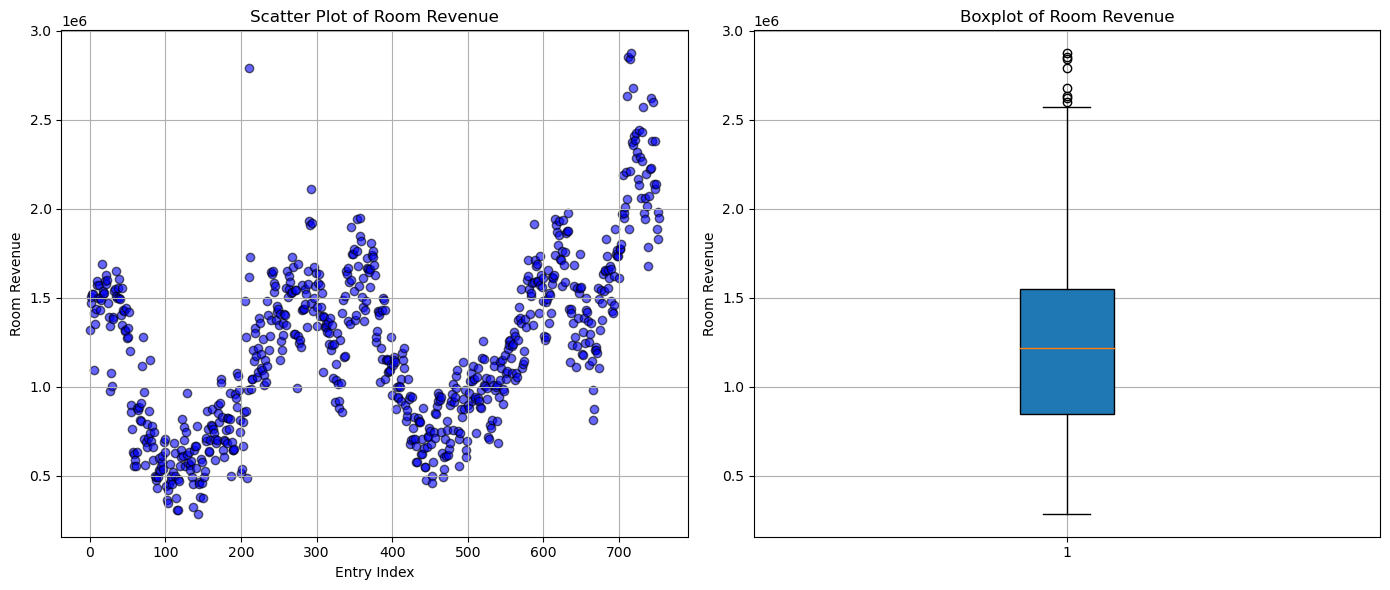

In [125]:
import matplotlib.pyplot as plt

df_file_combined_actual['Room Revenue'] = df_file_combined_actual['Room Revenue'].astype(int)

print("Minimun room revenue: " + str(df_file_combined_actual['Room Revenue'].min()))
print("Maximum room revenue: " + str(df_file_combined_actual['Room Revenue'].max()))


#PLotting the data to check for outliers
plt.figure(figsize=(14, 6))

# Scatter plot: entry index vs. Room Revenue
plt.subplot(1, 2, 1)
plt.scatter(df_file_combined_actual.index, df_file_combined_actual['Room Revenue'], alpha=0.6, color='blue', edgecolor='k')
plt.xlabel('Entry Index')
plt.ylabel('Room Revenue')
plt.title('Scatter Plot of Room Revenue')
plt.grid(True)

# Boxplot: visualize distribution and potential outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_file_combined_actual['Room Revenue'], vert=True, patch_artist=True)
plt.ylabel('Room Revenue')
plt.title('Boxplot of Room Revenue')
plt.grid(True)

plt.tight_layout()
plt.show()

### Removing outliers

In [126]:
Q1 = df_file_combined_actual['Room Revenue'].quantile(0.25)
Q3 = df_file_combined_actual['Room Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_file_combined_actual[(df_file_combined_actual['Room Revenue'] < lower_bound) | (df_file_combined_actual['Room Revenue'] > upper_bound)]

# Filter the DataFrame to remove outliers
df_file_combined_actual_no_outliers = df_file_combined_actual[(df_file_combined_actual['Room Revenue'] >= lower_bound) & (df_file_combined_actual['Room Revenue'] <= upper_bound)]

# Optional: Print the number of outliers removed
num_removed = len(df_file_combined_actual) - len(df_file_combined_actual_no_outliers)
print(f"Removed {num_removed} outliers out of {len(df_file_combined_actual)} entries.")

# Print the dates of removed outliers
if num_removed > 0:
    print(f"\nDates of removed outliers:")
    for date, revenue in zip(outliers['Date'], outliers['Room Revenue']):
        print(f"Date: {date}, Room Revenue: {revenue}")
else:
    print("\nNo outliers were removed.")

Removed 8 outliers out of 754 entries.

Dates of removed outliers:
Date: 2023-09-09 00:00:00, Room Revenue: 2791085
Date: 2025-02-14 00:00:00, Room Revenue: 2635719
Date: 2025-02-15 00:00:00, Room Revenue: 2855941
Date: 2025-02-18 00:00:00, Room Revenue: 2840361
Date: 2025-02-19 00:00:00, Room Revenue: 2874227
Date: 2025-02-21 00:00:00, Room Revenue: 2677835
Date: 2025-03-17 00:00:00, Room Revenue: 2621039
Date: 2025-03-20 00:00:00, Room Revenue: 2600593


Cleaned Minimun room revenue: 287340
Cleaned Maximum room revenue: 2575048


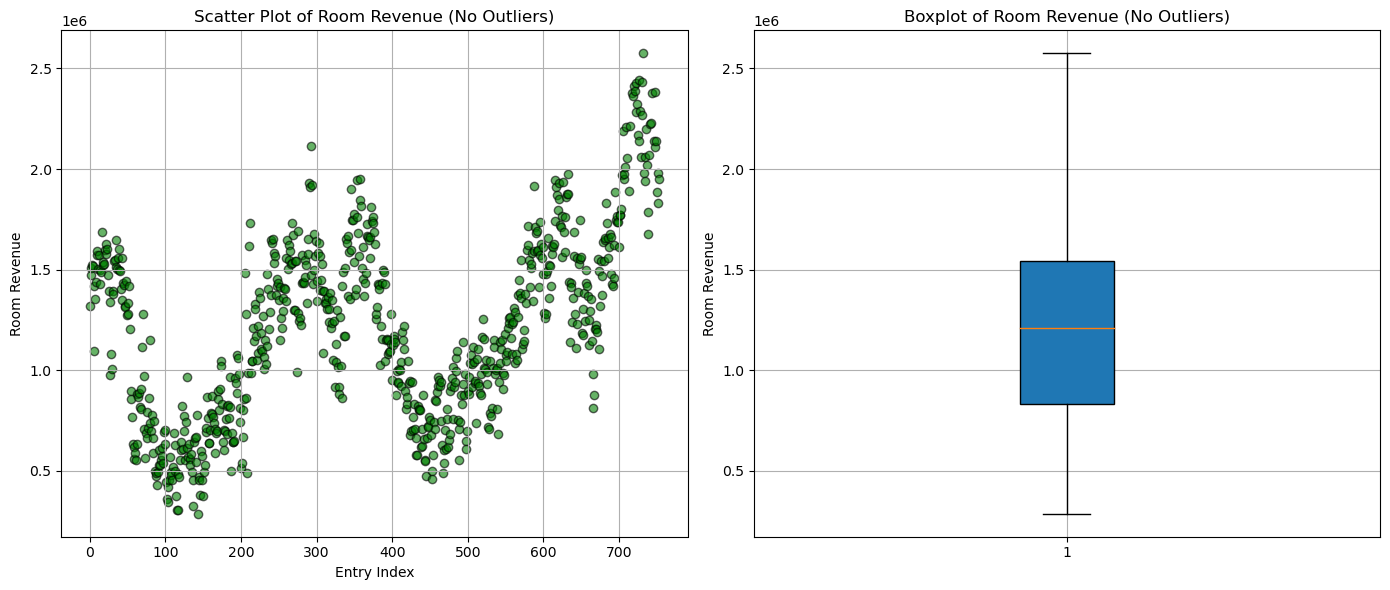

In [127]:
print("Cleaned Minimun room revenue: " + str(df_file_combined_actual_no_outliers['Room Revenue'].min()))
print("Cleaned Maximum room revenue: " + str(df_file_combined_actual_no_outliers['Room Revenue'].max()))

cleaned_min_df_file_combined_no_outliers = df_file_combined_actual_no_outliers['Room Revenue'].min()
cleaned_max_df_file_combined_no_outliers = df_file_combined_actual_no_outliers['Room Revenue'].max()
# Plot the cleaned data

plt.figure(figsize=(14, 6))

# Scatter Plot: Entry index vs. Room Revenue without outliers
plt.subplot(1, 2, 1)
plt.scatter(df_file_combined_actual_no_outliers.index, df_file_combined_actual_no_outliers['Room Revenue'], alpha=0.6, color='green', edgecolor='k')
plt.xlabel('Entry Index')
plt.ylabel('Room Revenue')
plt.title('Scatter Plot of Room Revenue (No Outliers)')
plt.grid(True)

# Boxplot: Distribution of Room Revenue without outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_file_combined_actual_no_outliers['Room Revenue'], vert=True, patch_artist=True)
plt.ylabel('Room Revenue')
plt.title('Boxplot of Room Revenue (No Outliers)')
plt.grid(True)

plt.tight_layout()
plt.show()


### After Outlier Removal
### ACF and PACF Analysis

In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def ACF_PACF(df, col):
    # Autocorrelation
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df[col].dropna(), ax=ax[0], lags=30)
    ax[0].set_title(f'ACF - {col}')

    # Partial Autocorrelation
    plot_pacf(df[col].dropna(), ax=ax[1], lags=30, method='ywm')
    ax[1].set_title(f'PACF - {col}')

    plt.tight_layout()
    plt.show()


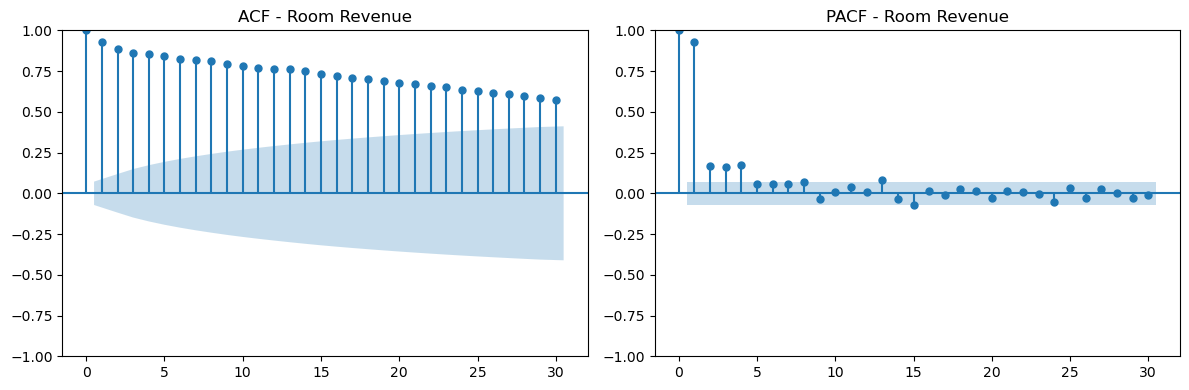

In [129]:
ACF_PACF(df_file_combined_actual_no_outliers, "Room Revenue")

In [130]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Suppose your DataFrame is df_1, indexed by Date
# and "Room Revenue" is the series to check.
def ADF_test(df, col):
    series = df[col].dropna()  # ensure no NaNs

    # Perform the ADF test
    adf_result = adfuller(series, autolag='AIC')

    # Extract results
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}, {value}')

In [131]:
ADF_test(df_file_combined_actual_no_outliers, "Room Revenue")

ADF Statistic: -1.7554309373559402
p-value: 0.4028025285129243
Critical Values:
   1%, -3.4392418578608983
   5%, -2.86546426916434
   10%, -2.568859710342903


In [132]:
df_file_combined_actual_no_outliers_for_AR = df_file_combined_actual_no_outliers.copy()
df_file_combined_actual_no_outliers_for_AR = df_file_combined_actual_no_outliers_for_AR.reset_index(drop=True)


In [133]:
df_file_combined_actual_no_outliers_for_AR['revenue_diff'] = df_file_combined_actual_no_outliers_for_AR['Room Revenue'] - df_file_combined_actual_no_outliers_for_AR['Room Revenue'].shift(1)
df_file_combined_actual_no_outliers_for_AR['revenue_diff'].dropna(inplace=True)


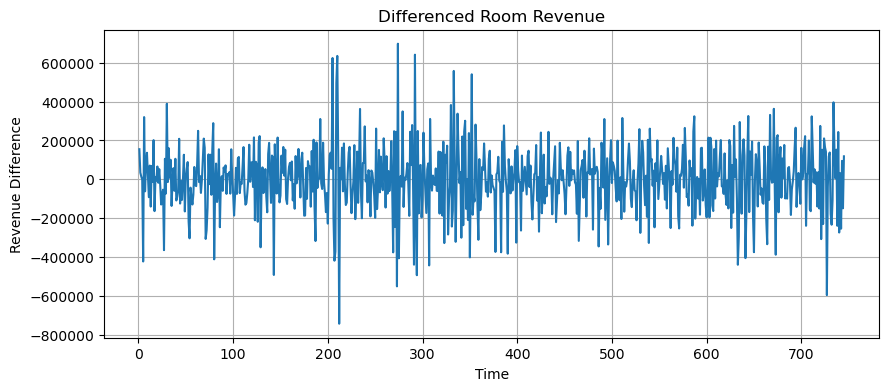

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df_file_combined_actual_no_outliers_for_AR['revenue_diff'])
plt.title('Differenced Room Revenue')
plt.xlabel('Time')
plt.ylabel('Revenue Difference')
plt.grid(True)
plt.show()


In [135]:
df_file_combined_actual_no_outliers_for_AR['Date'] = pd.to_datetime(df_file_combined_actual_no_outliers_for_AR['Date'])   # if not already
# Setting Date as the index for time series modelling
df_file_combined_actual_no_outliers_for_AR = df_file_combined_actual_no_outliers_for_AR.set_index('Date')
# df_file_combined_actual_no_outliers_for_AR.head()

In [136]:
# Dropping 1 row with Nan value in revenue_diff
df_file_combined_actual_no_outliers_for_AR = df_file_combined_actual_no_outliers_for_AR.dropna(subset=['revenue_diff'])
# df_4_files_combined_no_outliers_for_AR

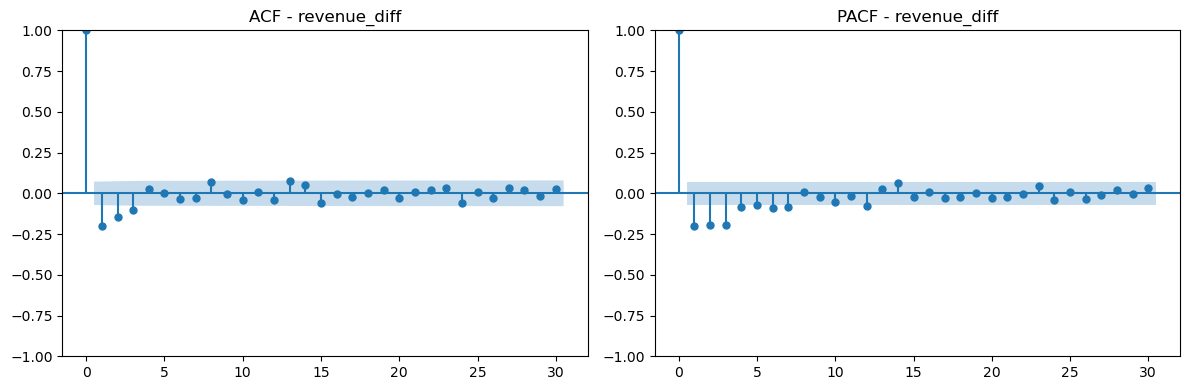

In [137]:
ACF_PACF(df_file_combined_actual_no_outliers_for_AR, "revenue_diff")

In [138]:
ADF_test(df_file_combined_actual_no_outliers_for_AR, "revenue_diff")

ADF Statistic: -14.644808673408779
p-value: 3.576553093612592e-27
Critical Values:
   1%, -3.4392418578608983
   5%, -2.86546426916434
   10%, -2.568859710342903


In [139]:
import pickle
df_file_combined_actual_no_outliers_for_AR.to_pickle('df_file_combined_actual_no_outliers_for_AR.pkl')

### Creating a new label for classification

Number of data points in each revenue bin:
Revenue Bin
1-2 Lakh       0
2-3 Lakh       1
3-4 Lakh       8
4-5 Lakh      25
5-6 Lakh      33
6-7 Lakh      53
7-8 Lakh      46
8-9 Lakh      52
9-10 Lakh     49
10-11 Lakh    52
11-12 Lakh    47
12-13 Lakh    51
13-14 Lakh    54
14-15 Lakh    64
15-16 Lakh    69
16-17 Lakh    49
17-18 Lakh    28
18-19 Lakh    15
19-20 Lakh    18
20-21 Lakh     6
21-22 Lakh     8
22-23 Lakh     7
23-24 Lakh     6
24-25 Lakh     4
25-26 Lakh     1
Name: count, dtype: int64


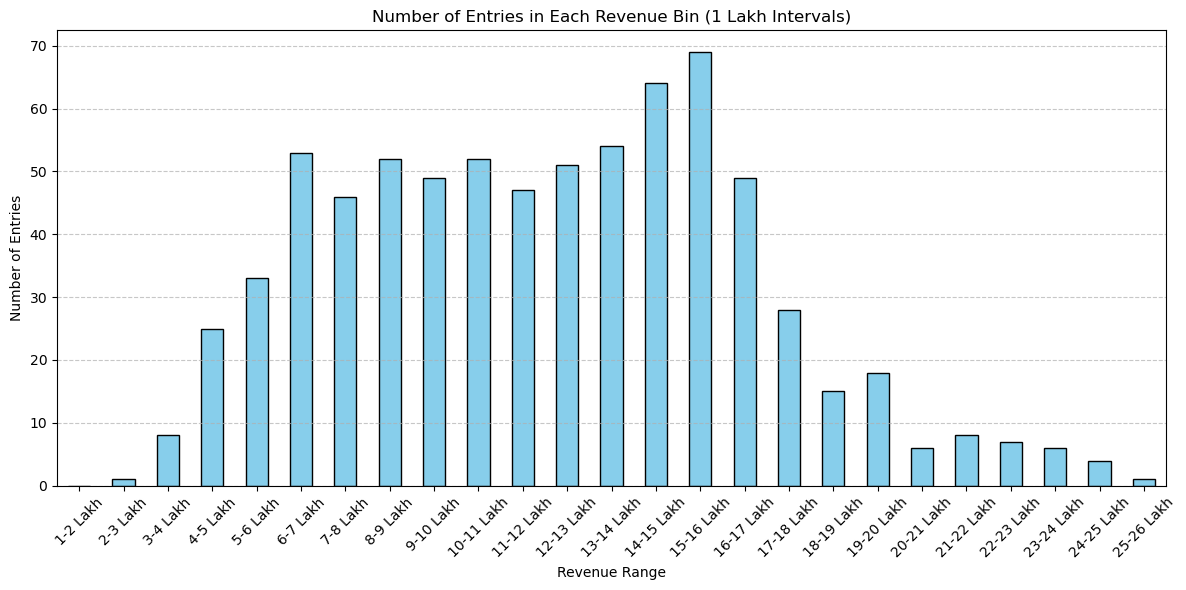

In [140]:
df_file_combined_actual_no_outliers_copy_1=df_file_combined_actual_no_outliers.copy()

start_bin = 100000
end_bin = ((cleaned_max_df_file_combined_no_outliers // 100000) + 1) * 100000  # round up to next 1 lakh
bins = np.arange(start_bin, end_bin + 1, 100000)    # create bin edges
labels = [f"{i}-{i+1} Lakh" for i in range(start_bin // 100000, end_bin // 100000)]

# Use pd.cut to segment the 'Room Revenue' into these custom bins
df_file_combined_actual_no_outliers_copy_1['Revenue Bin'] = pd.cut(df_file_combined_actual_no_outliers_copy_1['Room Revenue'], bins=bins, labels=labels, include_lowest=True)


bin_counts = df_file_combined_actual_no_outliers_copy_1['Revenue Bin'].value_counts().sort_index()

print("Number of data points in each revenue bin:")
print(bin_counts)

# Plot a bar chart of the revenue bin counts
plt.figure(figsize=(12, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Revenue Range')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### create a new label for further training

Number of data points in each revenue bin:
Revenue Whole Number
1      0
2      1
3      8
4     25
5     33
6     53
7     46
8     52
9     49
10    52
11    47
12    51
13    54
14    64
15    69
16    49
17    28
18    15
19    18
20     6
21     8
22     7
23     6
24     4
25     1
Name: count, dtype: int64


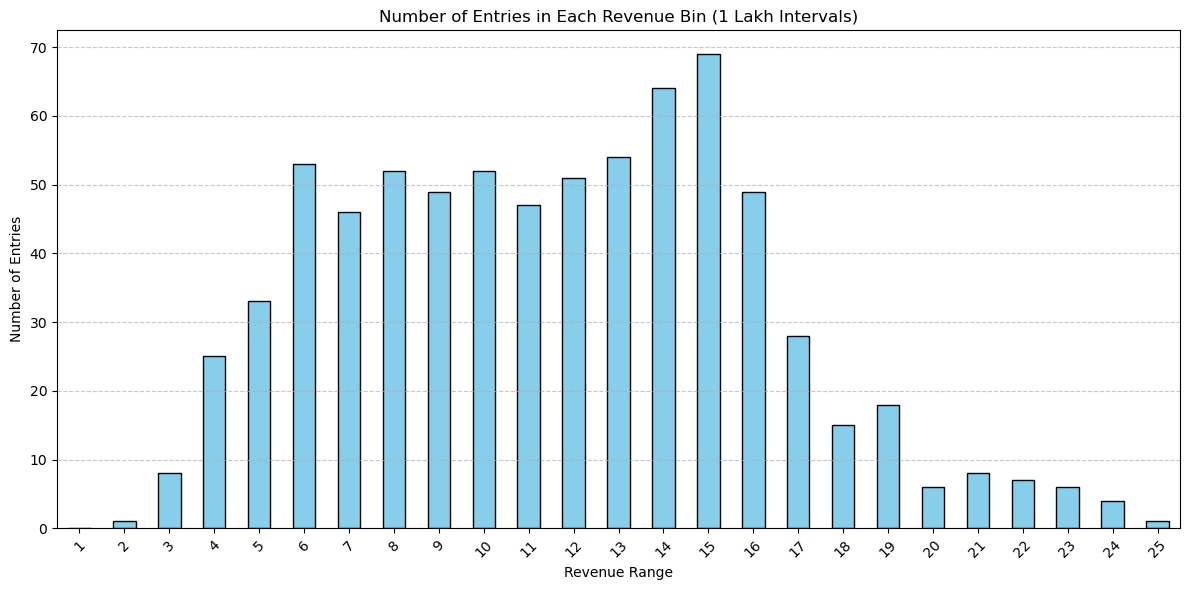

In [141]:
labels2 = [i for i in range(start_bin // 100000, end_bin // 100000)]
df_file_combined_actual_no_outliers_copy_1['Revenue Whole Number'] = pd.cut(df_file_combined_actual_no_outliers_copy_1['Room Revenue'], bins=bins, labels=labels2, include_lowest=True)
bin_counts2 = df_file_combined_actual_no_outliers_copy_1['Revenue Whole Number'].value_counts().sort_index()

print("Number of data points in each revenue bin:")
print(bin_counts2)

# Plot a bar chart of the revenue bin counts
plt.figure(figsize=(12, 6))
bin_counts2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Revenue Range')
plt.ylabel('Number of Entries')
plt.title('Number of Entries in Each Revenue Bin (1 Lakh Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Scaling data

#### Min-Max Scaler

In [142]:
df_file_combined_actual_no_outliers_min_max_scaled = df_file_combined_actual_no_outliers.copy()

In [143]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the "Room Revenue" column (ensure it remains a 2D array)
df_file_combined_actual_no_outliers_min_max_scaled['Room Revenue'] = scaler.fit_transform(
    df_file_combined_actual_no_outliers_min_max_scaled[['Room Revenue']]
)

# Verify the changes
print(df_file_combined_actual_no_outliers_min_max_scaled['Room Revenue'].describe())


count    746.000000
mean       0.402852
std        0.198913
min        0.000000
25%        0.238464
50%        0.403055
75%        0.548175
max        1.000000
Name: Room Revenue, dtype: float64


#### Standard Scaler

In [144]:
df_file_combined_actual_no_outliers_Standard_scaled = df_file_combined_actual_no_outliers.copy()

In [145]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the "Room Revenue" column (ensure it remains a 2D array)
df_file_combined_actual_no_outliers_Standard_scaled['Room Revenue'] = scaler.fit_transform(
    df_file_combined_actual_no_outliers_Standard_scaled[['Room Revenue']]
)

# Verify the changes
print(df_file_combined_actual_no_outliers_Standard_scaled['Room Revenue'].describe())


count    7.460000e+02
mean    -3.047904e-16
std      1.000671e+00
min     -2.026622e+00
25%     -8.269846e-01
50%      1.019455e-03
75%      7.310715e-01
max      3.004063e+00
Name: Room Revenue, dtype: float64


## df combined files for classification: 

In [146]:
df_file_combined_actual_no_outliers_copy_1.to_pickle('df_file_combined_actual_no_outliers_copy_1.pkl')
df_file_combined_actual_no_outliers_copy_1

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast,Revenue Bin,Revenue Whole Number
0,2023-02-06,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual,13-14 Lakh,13
1,2023-02-08,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual,14-15 Lakh,14
2,2023-02-09,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual,15-16 Lakh,15
3,2023-02-10,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual,15-16 Lakh,15
4,2023-02-11,Saturday,115.0,42.0,3.0,2.0,70.0,95.83,1519886,13216.40,22.0,10.0,225.0,120.0,2023-02-11,2023-02-11,actual,15-16 Lakh,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2025-03-24,Monday,106.0,42.0,5.0,3.0,65.0,89.83,2141573,20203.52,24.0,12.0,182.0,118.0,2025-03-24,2025-03-24,actual,21-22 Lakh,21
750,2025-03-25,Tuesday,90.0,22.0,0.0,2.0,64.0,76.27,1887536,20972.63,23.0,12.0,149.0,118.0,2025-03-25,2025-03-25,actual,18-19 Lakh,18
751,2025-03-26,Wednesday,95.0,40.0,3.0,3.0,52.0,81.20,1982159,20864.84,23.0,13.0,156.0,117.0,2025-03-26,2025-03-26,actual,19-20 Lakh,19
752,2025-03-27,Thursday,82.0,34.0,2.0,4.0,54.0,73.87,1832875,22352.14,31.0,19.0,145.0,111.0,2025-03-27,2025-03-27,actual,18-19 Lakh,18


## df combined files for regression: 

In [147]:
df_file_combined_actual_no_outliers.to_pickle('df_file_combined_actual_no_outliers.pkl')
df_file_combined_actual_no_outliers

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06,Monday,101.0,68.0,2.0,3.0,34.0,85.59,1318517,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-08,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
2,2023-02-09,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
3,2023-02-10,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
4,2023-02-11,Saturday,115.0,42.0,3.0,2.0,70.0,95.83,1519886,13216.40,22.0,10.0,225.0,120.0,2023-02-11,2023-02-11,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2025-03-24,Monday,106.0,42.0,5.0,3.0,65.0,89.83,2141573,20203.52,24.0,12.0,182.0,118.0,2025-03-24,2025-03-24,actual
750,2025-03-25,Tuesday,90.0,22.0,0.0,2.0,64.0,76.27,1887536,20972.63,23.0,12.0,149.0,118.0,2025-03-25,2025-03-25,actual
751,2025-03-26,Wednesday,95.0,40.0,3.0,3.0,52.0,81.20,1982159,20864.84,23.0,13.0,156.0,117.0,2025-03-26,2025-03-26,actual
752,2025-03-27,Thursday,82.0,34.0,2.0,4.0,54.0,73.87,1832875,22352.14,31.0,19.0,145.0,111.0,2025-03-27,2025-03-27,actual


## df combined files with min max scaling: 

In [148]:
df_file_combined_actual_no_outliers_min_max_scaled.to_pickle('df_file_combined_actual_no_outliers_min_max_scaled.pkl')
df_file_combined_actual_no_outliers_min_max_scaled

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06,Monday,101.0,68.0,2.0,3.0,34.0,85.59,0.450747,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-08,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,0.518373,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
2,2023-02-09,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,0.533391,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
3,2023-02-10,Friday,114.0,40.0,3.0,2.0,76.0,95.00,0.539513,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
4,2023-02-11,Saturday,115.0,42.0,3.0,2.0,70.0,95.83,0.538769,13216.40,22.0,10.0,225.0,120.0,2023-02-11,2023-02-11,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2025-03-24,Monday,106.0,42.0,5.0,3.0,65.0,89.83,0.810520,20203.52,24.0,12.0,182.0,118.0,2025-03-24,2025-03-24,actual
750,2025-03-25,Tuesday,90.0,22.0,0.0,2.0,64.0,76.27,0.699476,20972.63,23.0,12.0,149.0,118.0,2025-03-25,2025-03-25,actual
751,2025-03-26,Wednesday,95.0,40.0,3.0,3.0,52.0,81.20,0.740837,20864.84,23.0,13.0,156.0,117.0,2025-03-26,2025-03-26,actual
752,2025-03-27,Thursday,82.0,34.0,2.0,4.0,54.0,73.87,0.675582,22352.14,31.0,19.0,145.0,111.0,2025-03-27,2025-03-27,actual


## df combined files with standard scaling: 

In [149]:
df_file_combined_actual_no_outliers_Standard_scaled.to_pickle('df_file_combined_actual_no_outliers_Standard_scaled.pkl')
df_file_combined_actual_no_outliers_Standard_scaled

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast
0,2023-02-06,Monday,101.0,68.0,2.0,3.0,34.0,85.59,0.240943,13054.63,29.0,12.0,181.0,118.0,2023-02-06,2023-02-06,actual
1,2023-02-08,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,0.581149,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual
2,2023-02-09,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,0.656701,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual
3,2023-02-10,Friday,114.0,40.0,3.0,2.0,76.0,95.00,0.687498,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual
4,2023-02-11,Saturday,115.0,42.0,3.0,2.0,70.0,95.83,0.683755,13216.40,22.0,10.0,225.0,120.0,2023-02-11,2023-02-11,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2025-03-24,Monday,106.0,42.0,5.0,3.0,65.0,89.83,2.050849,20203.52,24.0,12.0,182.0,118.0,2025-03-24,2025-03-24,actual
750,2025-03-25,Tuesday,90.0,22.0,0.0,2.0,64.0,76.27,1.492220,20972.63,23.0,12.0,149.0,118.0,2025-03-25,2025-03-25,actual
751,2025-03-26,Wednesday,95.0,40.0,3.0,3.0,52.0,81.20,1.700296,20864.84,23.0,13.0,156.0,117.0,2025-03-26,2025-03-26,actual
752,2025-03-27,Thursday,82.0,34.0,2.0,4.0,54.0,73.87,1.372020,22352.14,31.0,19.0,145.0,111.0,2025-03-27,2025-03-27,actual


In [150]:
df_prepared = df_file_combined_actual_no_outliers_for_AR.copy()
df_prepared = df_prepared.reset_index().rename(columns={"index": "Date"})
df_prepared

,Date,Day,Rooms Sold,Arrival Rooms,Compliment Rooms,House Use,Individual Confirm,Occupancy %,Room Revenue,ARR,Departure Rooms,OOO Rooms,Pax,Total Room Inventory,snapshot_date,arrival_date,actual_or_forecast,revenue_diff
0,2023-02-08,Wednesday,115.0,31.0,2.0,2.0,61.0,95.04,1473226,12810.66,16.0,9.0,202.0,121.0,2023-02-08,2023-02-08,actual,154709.0
1,2023-02-09,Thursday,116.0,38.0,2.0,2.0,59.0,95.87,1507583,12996.41,12.0,10.0,214.0,121.0,2023-02-09,2023-02-09,actual,34357.0
2,2023-02-10,Friday,114.0,40.0,3.0,2.0,76.0,95.00,1521588,13347.26,24.0,10.0,232.0,120.0,2023-02-10,2023-02-10,actual,14005.0
3,2023-02-11,Saturday,115.0,42.0,3.0,2.0,70.0,95.83,1519886,13216.40,22.0,10.0,225.0,120.0,2023-02-11,2023-02-11,actual,-1702.0
4,2023-02-12,Sunday,86.0,28.0,5.0,2.0,58.0,71.67,1096850,12754.08,22.0,10.0,177.0,120.0,2023-02-12,2023-02-12,actual,-423036.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,2025-03-24,Monday,106.0,42.0,5.0,3.0,65.0,89.83,2141573,20203.52,24.0,12.0,182.0,118.0,2025-03-24,2025-03-24,actual,31341.0
741,2025-03-25,Tuesday,90.0,22.0,0.0,2.0,64.0,76.27,1887536,20972.63,23.0,12.0,149.0,118.0,2025-03-25,2025-03-25,actual,-254037.0
742,2025-03-26,Wednesday,95.0,40.0,3.0,3.0,52.0,81.20,1982159,20864.84,23.0,13.0,156.0,117.0,2025-03-26,2025-03-26,actual,94623.0
743,2025-03-27,Thursday,82.0,34.0,2.0,4.0,54.0,73.87,1832875,22352.14,31.0,19.0,145.0,111.0,2025-03-27,2025-03-27,actual,-149284.0
